In [45]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import data

In [9]:
boston = r"C:/Users/hp/Desktop/BostonHousing.csv"
df = pd.read_csv(boston)

In [147]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_group,age-binned
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,70 years and older,between 35 and 70 years
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,70 years and older,70 years and older
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,70 years and older,between 35 and 70 years
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,between 35 and 70 years,between 35 and 70 years
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,between 35 and 70 years,between 35 and 70 years
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,70 years and older,between 35 and 70 years
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,70 years and older,between 35 and 70 years
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,70 years and older,70 years and older
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,70 years and older,70 years and older
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,70 years and older,70 years and older


In [13]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [87]:
df['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

# Basic Insights of Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [15]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <BarContainer object of 10 artists>)

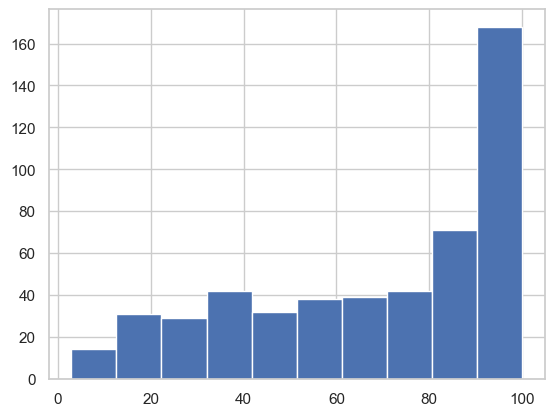

In [51]:
plt.hist(df['age'])

# Descriptive statistics and visualization 

## Boxplot - medv

Text(0.5, 0, 'median values of houses')

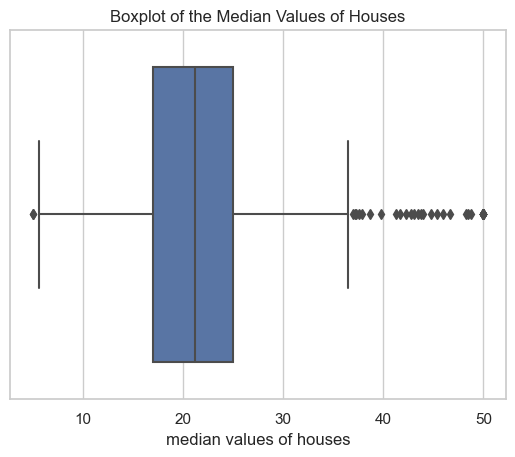

In [136]:
ax = sns.boxplot(x='medv', data=df)
ax.set_title("Boxplot of the Median Values of Houses")
ax.set_xlabel('median values of houses')

<b>The boxplot shows that there exist outliers in the distribution of the medv while most values fall within the range of 5 to 35 (in $ 1000's)</b></p>

## Bar plot

Text(0.5, 1.0, 'Bar chart of Chalres River variable')

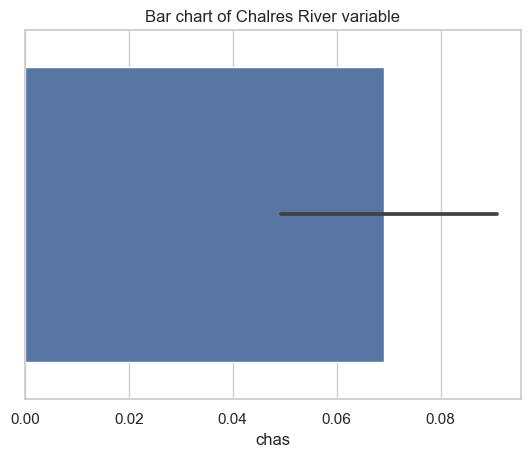

In [126]:
# the bar chart displays the distribution of the charles river (dummy variable)
ax = sns.barplot(x="chas", data=df)
ax.set_title("Bar chart of Chalres River variable")

## Boxplot - age

In [53]:
bins = np.linspace(min(df['age']), max(df['age']), 4)
bins

array([  2.9       ,  35.26666667,  67.63333333, 100.        ])

In [57]:
group_names = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

In [58]:
df['age-binned'] = pd.cut(df['age'], bins, labels=group_names, include_lowest=True)

In [60]:
df['age-binned'].value_counts()

70 years and older         296
between 35 and 70 years    119
35 years and younger        91
Name: age-binned, dtype: int64

Text(0.5, 1.0, 'Age bins')

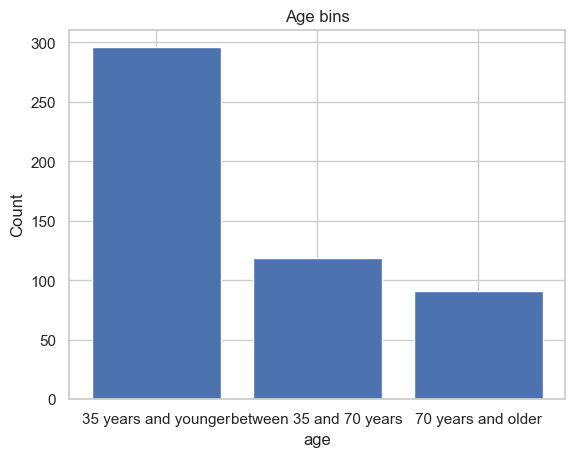

In [82]:
plt.bar(group_names, df['age-binned'].value_counts())
plt.xlabel("age")
plt.ylabel("Count")
plt.title("Age bins")

Text(0.5, 0, 'median values of houses')

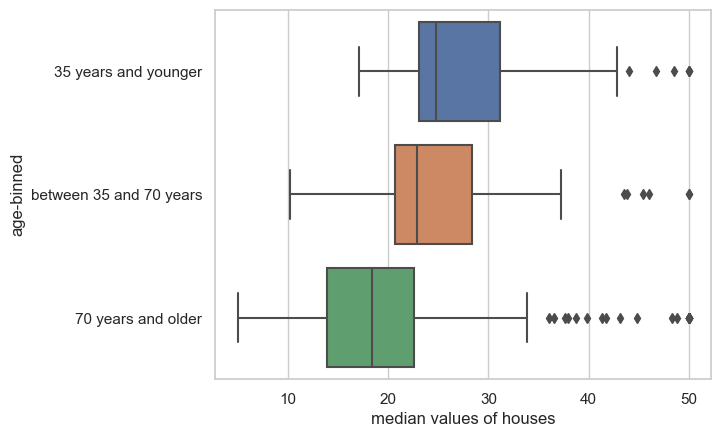

In [128]:
ax = sns.boxplot(x='medv', y='age-binned', data=df)
ax.set_xlabel('median values of houses')

**The boxplot shows distribution of the three categories of the discretized age variable against the median values of houses**. **<font color ='red'>The plot displays outliers in the three age groups.</font>**</p>

## Scatter plot

Text(0.5, 1.0, 'Relationship between Nox and Indus')

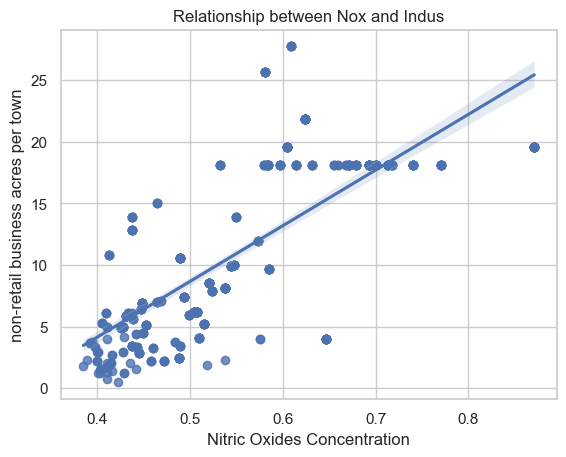

In [130]:
ax = sns.regplot(x = 'nox', y = 'indus', data=df)
ax.set_xlabel('Nitric Oxides Concentration')
ax.set_ylabel('non-retail business acres per town')
ax.set_title('Relationship between Nox and Indus')

**The scatter plot shows that there is a moderately strong positive relationship between the <font color ='blue'>Nitric Oxide concentration</font> and the <font color='red'> propotion on non-retail buinsess acres per town.</font>** </p>

## Historagm

Text(0, 0.5, 'Count')

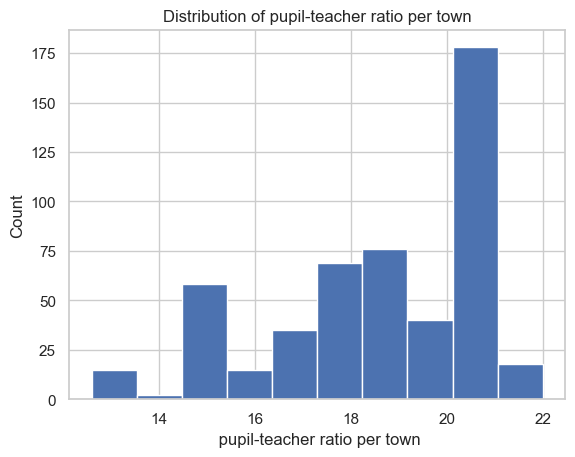

In [144]:
plt.hist(df['ptratio'])
plt.title("Distribution of pupil-teacher ratio per town")
plt.xlabel(' pupil-teacher ratio per town')
plt.ylabel("Count")

# Analysis

### Is there is a siginficant difference in median value of houses bounded by the charles river or not? 

In [99]:
import scipy.stats

State the hypothesis
* $H_0:$ There is no difference in the median values of houses
* $H_1:$  There is a difference in the median values of houses


In [100]:
scipy.stats.ttest_ind(df[df['chas'] == 0]['medv'],
                     df[df['chas'] == 1]['medv'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in the median value of houses bounded by the Charles river


### Is there is a difference in Median Values of houses (medv) for each proportion of owner occupied untis built prior to 1940 (AGE)?

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three age group means are equal)
* $H_1:$ At least one of the means differ


Test for equality of variance


In [102]:
scipy.stats.levene(df[df['age_group'] == '35 years and younger']['medv'],
                   df[df['age_group'] == 'between 35 and 70 years']['medv'], 
                   df[df['age_group'] == '70 years and older']['medv'], 
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=2.907937021568495, pvalue=0.05550655447537772)

First, separate the three samples (one for each job category) into a variable each.


In [103]:
thirtyfive_lower = df[df['age_group'] == '35 years and younger']['medv']
thirtyfive_seventy = df[df['age_group'] == 'between 35 and 70 years']['medv']
seventy_older = df[df['age_group'] == '70 years and older']['medv']

In [107]:
f_statistic, p_vlaue = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 28.614101859178227, P-Value: 7.913361061240043e-98


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### Can we conclude that there is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town? 

State the hypothesis
* $H_0:$ There is no relationship between the 'NO' concentration and non-retail buisness acres per town
* $H_1:$  There is a relationship between the 'NO' concentration and non-retail buisness acres per town


Text(0.5, 1.0, 'Relationship between Nox and Indus')

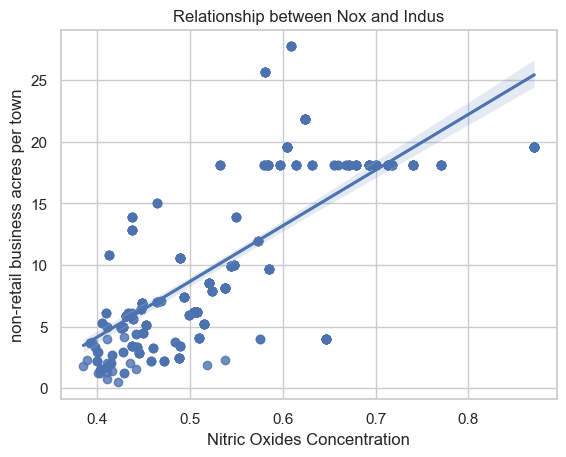

In [137]:
ax = sns.regplot(x = 'nox', y = 'indus', data=df)
ax.set_xlabel('Nitric Oxides Concentration')
ax.set_ylabel('non-retail business acres per town')
ax.set_title('Relationship between Nox and Indus')

In [113]:
pearson, p_value = scipy.stats.pearsonr(df['nox'], df['indus'])
print('pearson is:', pearson, 'p value is:', p_value)

pearson is: 0.7636514469209149 p value is: 7.913361061240043e-98


#### Conclusion:
Since the p-value is < 0.05, the correlation between nox and indus is statistically significant, and the coefficient of about 0.76 shows that the relationship is positive and moderately strong.


### What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes? 

State the hypothesis
* $H_0:$ The additional weighted distance has no impact on the median values of houses 
* $H_1:$  The additional weighted distance has an impact on the median values of houses 


Text(0, 0.5, 'median values of houses')

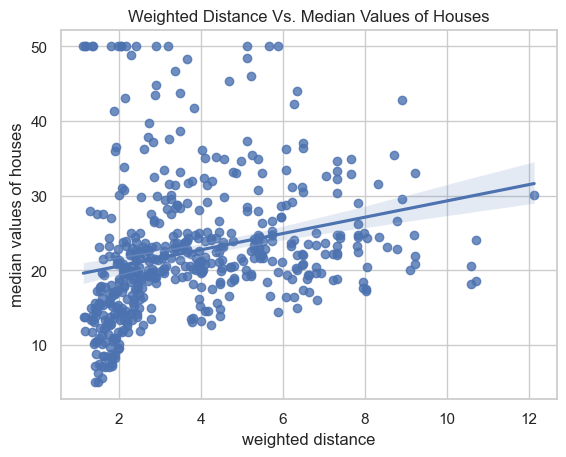

In [141]:
ax = sns.regplot(x='dis', y='medv', data=df)
ax.set_title('Weighted Distance Vs. Median Values of Houses')
ax.set_xlabel('weighted distance')
ax.set_ylabel('median values of houses')

In [121]:
pearson, p_value = scipy.stats.pearsonr(df['dis'], df['medv'])
print('pearson is: ', pearson, 'p value is: ', p_value)

pearson is:  0.24992873408590394 p value is:  1.2066117273368359e-08


In [116]:
import statsmodels.api as sm

In [122]:
# x is the input variable (or independent vairable)
x = df['dis']
# y is the target/dependent vairable
y = df['medv']
# add an intercept (beta_0) to our model
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        08:16:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:
**P_value is less than 0.05, we reject the null hpyothesis, as the median values of houses incease with the additional weighted distance to the five Boston employment centers.** 